# Statistisk inferens

Vi skal se mer på Bayes teorem og statistisk inferens. Først importerer vi de pakkene og klassene vi trenger.

In [1]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

I dette eksempelet ser vi på julenisseoppgaven i læreboka, på side 232 (Statistisk infersens: Bayes teorem, oppgave 1).

Vi får oppgitt at julenissens verksted lager 10 typer sekker (nummerert 1-10). Det blir laget 17 ganger sekknummer av hver sekktype. Altså 17 av type 1, 34 av type 2 osv. Det er $sekknummer^2%$ myke pakker i sekkene.

For å presentere dette i kodeform, på en ryddig måte, bruker vi Pandas sin Series-klasse. Først lager vi en serie med tallene fra 1 t.o.m. 10, som er sekktypenummer/indekser.

Prioren vår blir da dette tallet, ganger 17. En veldig nyttig snarvei med Pandas-serier, er at vi kan gjøre regneoperasjoner på dem direkte. Hvis vi tar f.eks. en serie, ganget et heltall, blir alle elementene i serien ganget med dette tallet, og vi får en ny serie. Dette er "priors"-variabelen i koden under.

Tilsvarende gjør vi for likelihood, bare at vi skal ha $sekknummer^2$ her. Python bruker ** som potens-operator.

PxL-kolonnen er ganske enkelt prior og likelihood ganget sammen, og posterior er dette, delt på summen av kolonnen. Altså normalisert.

In [2]:
sekk_indekser = Series(range(1,11)) # [1...10]

priors = sekk_indekser*17 # 17, 34, 51, ...
likelihood = sekk_indekser**2
pxl = priors * likelihood
posterior = pxl/sum(pxl)

Nå har vi laget alle variablene vi trenger, og kan sette det sammen til en dataframe. Da kan vi enkelt plotte en eller flere av kolonnene, samt få ut en tabell.

,Prior,Likelihood,PxL,Posterior
1,17,1,17,0.000331
2,34,4,136,0.002645
3,51,9,459,0.008926
4,68,16,1088,0.021157
5,85,25,2125,0.041322
6,102,36,3672,0.071405
7,119,49,5831,0.113388
8,136,64,8704,0.169256
9,153,81,12393,0.240992
10,170,100,17000,0.330579


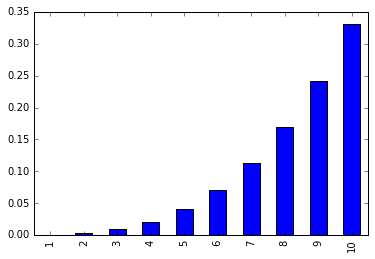

In [3]:
# Lager dataframe med rad-indekser (sekk-nummer) f.o.m. 1 t.o.m. 10.
df = DataFrame()

# Vi kunne brukt DataFrame.from_dict, men da vil rekkefølgen på kolonnene være tilfeldig.
# Derfor kan det lønne seg å sette inn kolonner slik:
df['Prior'] = priors
df['Likelihood'] = likelihood
df['PxL'] = pxl
df['Posterior'] = posterior
df.index = sekk_indekser

df['Posterior'].plot.bar()

df

### Oppdatering

Vi får i eksempelet vite at nissen plukker to tilfeldige pakker fra en sekk, og blir bedt om å finne ut hva det sier oss om sekken han plukket fra. Vi forenkler, og regner med trekk med tilbakelegging. Dermed tar vi ny likelihood, som forrige likelihood i andre.

Merk at vi her gjør hele prosessen litt kortere. Istedenfor å lage variabler for prior, likelihood osv. som over, lager vi ny dataframe, med de riktige kolonnene direkte ved å legge inn i "df2['Prior']" osv. fra starten.

Vi plotter, og viser den nye dataframen i tabellform.

,Prior,Likelihood,PxL,Posterior
1,0.000331,1,0.000331,5.530843e-08
2,0.002645,16,0.042314,7.079480e-06
3,0.008926,81,0.722975,1.209595e-04
4,0.021157,256,5.416198,9.061734e-04
5,0.041322,625,25.826446,4.320971e-03
6,0.071405,1296,92.540826,1.548282e-02
7,0.113388,2401,272.245620,4.554887e-02
8,0.169256,4096,693.273388,1.159902e-01
9,0.240992,6561,1581.146777,2.645385e-01
10,0.330579,10000,3305.785124,5.530843e-01


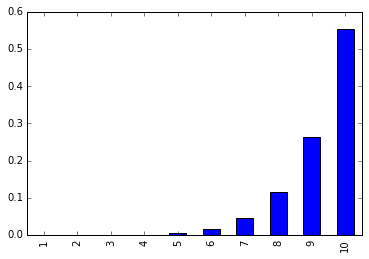

In [4]:
df2 = DataFrame()

df2['Prior'] = df['Posterior']
df2['Likelihood'] = df['Likelihood']**2
df2['PxL'] = df2['Prior'] * df2['Likelihood']
df2['Posterior'] = df2['PxL']/sum(df2['PxL'])

df2['Posterior'].plot.bar()

df2

Vi kan se at vi er blitt sikrere på at sekken er blant de med høyere typenummer, da disse inneholder en større andel myke pakker, og nissen tilfeldigvis trakk to myke pakker til oss.

## Kontinuerlig funksjon og symbolsk integrasjon

Det hender vi får funksjoner med delt funksjonsforskrift. Med metodene vi har brukt tidligere, vil vi ikke få noen særlig hjelp i disse tilfellene. Ja, vi kan gjøre numerisk integrasjon ved å evaluere veldig mange punkter, men la oss heller se på en annen løsning.

Anaconda blir levert med en pakke som heter "sympy". Denne pakken lar deg regne symbolsk med Python. Vi kan mao. definere funksjoner, og integrere dem, uten å evaluere dem med konkrete verdier.

In [5]:
# Slå av advarsler.
import warnings
warnings.filterwarnings('ignore')

# Importer det vi trenger fra sympy, og sett opp printing, slik at vi får penere resultater ut.
from sympy import init_printing, Symbol, Piecewise, plot, simplify, piecewise_fold
init_printing()

Vi kan nå lage en symbolsk variabel. Denne kan vi bruke i en Piecewise-funksjon. Piecewise tar inn parametere for alle delfunksjonene i såkalte tuples, på formen "(funksjon, kriterie)". Her er funksjonen altså 0 for x <= -2 osv.

Vi plotter denne med sympy sin plotfunksjon, og returnerer prior, slik at vi ser funksjonen under grafen.

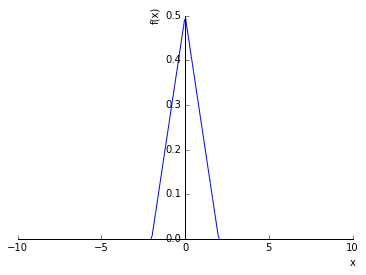

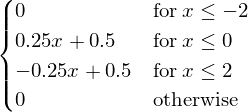

In [6]:
x = Symbol('x')
prior = Piecewise(
    (0, x <= -2),
    (0.5+0.25*x, x <= 0),
    (0.5-0.25*x, x <= 2),
    (0, True), x
)

plot(prior, adaptive=False)
prior

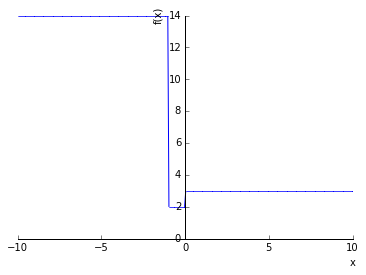

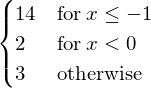

In [7]:
likelihood = Piecewise(
    (14, x <= -1),
    (2, x < 0),
    (3, True)
)

plot(likelihood, adaptive=False)
likelihood

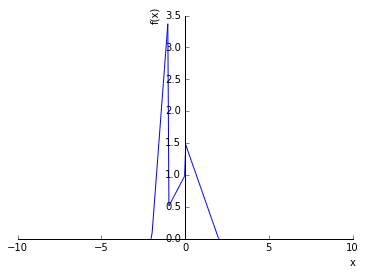

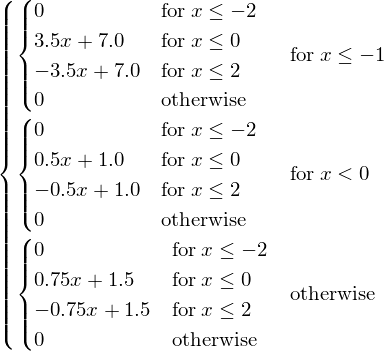

In [8]:
pxl = piecewise_fold(prior*likelihood)

plot(pxl, adaptive=False)
pxl


Sympy gjør også integrasjon, men dessverre håndterer den ikke funksjoner med delt funksjonsforskrift (Piecewise)-funksjoner særlig godt. Dette er noe utviklerne er klar over, og vil forhåpentligvis bli utbedre t i fremtiden.

Prøv gjerne å kjøre koden under, og se om du får riktig resultat:

-4.50000000000000


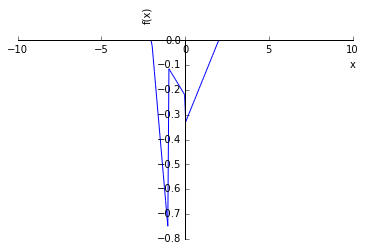

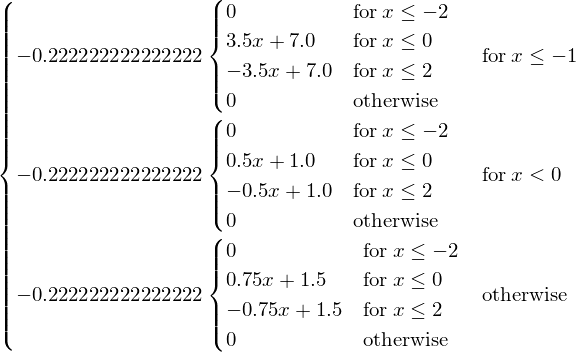

In [9]:
from sympy import oo, integrate
s = integrate(pxl, (x, -oo, oo))

print(s)

posterior = piecewise_fold(pxl/s)

plot(posterior, adaptive=False)
posterior